# The Numpy.random Package

## 1.0 The Purpose of the Package

### Uses for Pseudorandom Number Generators

Random numbers are used for a variety of purposes. Some examples include:

Games: Generate a different level each time the user returns to a game. Or with seeds you could ensure enemys came from the same place for that level

Creative Coding: Generating random arrangement of shapes and colours. If you wanted to make adjustments you would use it without the seeds.

Dummy Data: Creating dummy data for testing ideas.

Simulations: Monte Carlo Simula
tions.

## 2.0. Simple Random Data and Permutations

### 2.1. Simple Random Data

#### 2.1.1. rand

This creates random numbers in a uniform distribution, meaning that the values are completely random in that the probability of a number being selected is equal across all numbers in the range. You can also specify the shape of the numbers in multiple dimensions. Entering one arguement will create a line. All numbers generate will be between 0 and 1.

[7.20324493e-01 1.14374817e-04 3.02332573e-01 1.46755891e-01
 9.23385948e-02 1.86260211e-01 3.45560727e-01 3.96767474e-01
 5.38816734e-01 4.19194514e-01]


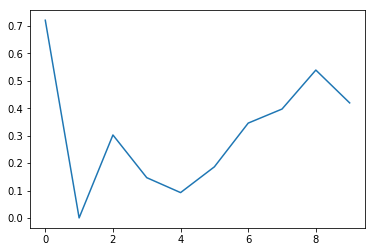

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

list = np.random.rand(10)
print(list)
plt.plot(list)
plt.show()
    

It can also be used to create a random number

In [2]:
np.random.rand()

0.33931858310048946

#### 2.1.2. randn

This function produces random number is a normal distribution as a opposed to a uniform distribution. It can take either an integer or shape as it's input. A normal distribution results in a "bell curve" when charted. This mean that higher percentate of the floats produced by the function will be clustered around the mean. 68.26% will be one standard deviation above or below the mean. 95.44% will be two standard deviation away from the mean. 99.72% will be 3 standard deviations away from the mean. 

When using *randn* the distribution produced will always have a mean of 0 and variance of 1

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


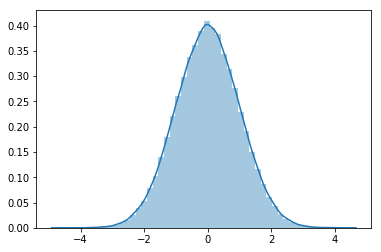

In [3]:
randnarray = np.random.randn(100000,1)

sns.distplot(randnarray)

#### 2.1.3. randint

This function produces random integers in the range that is inputted. You can also specify the amount of numbers to be produced. If no "size" is specified the function will just produce one result. The upper range must always be one higher than the highest number you want to select from. For example, if 10 is the highest number you want, then you must enter 11 in the function parameters.

In [4]:
# Picking a number between 1 and 10
np.random.randint(0, 11)

1

In [5]:
# Pick a number between -1 and -10
np.random.randint(-10, 0)

-3

In [6]:
# 10 random numbers from between 100 and 200.
np.random.randint(100, 201)

143

It is also possible to produce different shapes by entering a tuple as the "size" parameter. 

In [7]:
np.random.randint(11, size=(3,2,5))

array([[[10,  2,  0,  5,  4],
        [10,  3,  6,  1,  0]],

       [[ 9, 10,  0,  4,  8],
        [ 0,  4,  2,  6,  0]],

       [[ 4,  9,  0,  1, 10],
        [ 7,  7,  2,  2,  1]]])

Finally, you can also specify the data type (dtype). 

In [8]:
np.random.randint(1, dtype="int")

0

Floats and complex numbers are not supported, boolean outputs are as long as you limit the "high" value to 2.

In [9]:
np.random.randint(2, dtype="bool")

True

#### Use: Random phone number generator or dice rolls

#### 2.1.4. random_integers

This is a deprecated function that has been replaced by *randint* which is discussed above.

#### random_sample, random, ranf, sample

These four functions all return a random float or array of floats depending on the parameters used. 

In [10]:
# single random float
np.random.random_sample()

0.29524961463316635

In [11]:
# array of floats
np.random.random((5,2))

array([[0.22190504, 0.33615437],
       [0.78397903, 0.30211901],
       [0.10982801, 0.45783786],
       [0.94011654, 0.1101776 ],
       [0.91051599, 0.27134861]])

#### 2.1.5. choice

This function selects random options from a given one dimensional array. The options can be ints, floats, or an array like object such a list or tuple.

For example, you could use this to randomly select a city in Ireland.

In [12]:
# Where will I go for the long weekend?

cities = ["Limerick", "Galway", "Cork", "Dublin", "Waterford", "Kilkenny"]
print("You're going to " + np.random.choice(cities) + "!!!!")

You're going to Dublin!!!!


As with all the previous random functions, you can also specify the shape of the data you want to select. You can also choose to prevent the same result being returned twice using the "replacement" parameter.

In [13]:
# Randomly rank the cities in two tiers - without using replacement you can end up with the same city in both tiers.

np.random.choice(cities, size=(2,3))

array([['Limerick', 'Limerick', 'Limerick'],
       ['Galway', 'Dublin', 'Waterford']], dtype='<U9')

In [14]:
# Randomly rank the cities in two tiers - with replacement = false you will get two sets of unique values

np.random.choice(cities, size=(2,3), replace=False)

array([['Waterford', 'Limerick', 'Cork'],
       ['Galway', 'Dublin', 'Kilkenny']], dtype='<U9')

Finally, you can also weight the probability of a certain option being selected. The sum of the probabilites must be 1.

In [15]:
# What is the best city in Ireland? 
print("Our totally unbiased computer has selected " + np.random.choice(cities, p=[0.95, 0.01, 0.01, 0.01, 0.01, 0.01])
          + " as the best city in Ireland.")

Our totally unbiased computer has selected Limerick as the best city in Ireland.


#### 2.1.6. bytes

This function generates a string of bytes of a specified length.

In [16]:
np.random.bytes(20)

b'\x93\xe1\x85\xbcA\xab\xeaY-\xf8\xebA\xafS>=\xe4\xb8\x965'

Bar some creepy ouija board scenario, the bytes returned will be nonsense, but we can attempt to decode and view the characters using the "chardet" package and the "decode" method. However, sometimes the bytes won't have encoding and we won't be able to translate.

In [17]:
"""Detect what the encoding used is. https://stackoverflow.com/questions/15918314/how-to-detect-string-byte-encoding"""
import chardet

bytes_str = np.random.bytes(10)
print("Your string of bytes:", bytes_str)
print(" ")
detect_encoding = chardet.detect(bytes_str)["encoding"]
if detect_encoding is None:
    print("Bytes not encoded - can't translate")
else:
    print("Encoding type detected =", detect_encoding)
    print(" ")
    print("Decoded bytes =", bytes_str.decode(detect_encoding))


Your string of bytes: b'\x8cvc\xf6\x95\xec\x9bV\xcex'
 
Encoding type detected = Windows-1252
 
Decoded bytes = Œvcö•ì›VÎx


In [18]:
# bytes to integer
bytes2 = np.random.bytes(1)
int.from_bytes(bytes2, byteorder="big")

27

### 2.2. Permutations

#### 2.2.1. Shuffle

The shuffle function reorganises an array of data. See example below.

In [19]:
shuff_ints = np.random.randint(100, size=10)
print(shuff_ints)
np.random.shuffle(shuff_ints)
print(shuff_ints)

[83 94 35 34 93  5 25 91 31 30]
[25  5 31 30 34 93 94 83 35 91]


Most people would be familiar with the concept of shuffling from playing cards. It ensures fairnees by breaking up the order of cards from their suits and values / heirarchy. 

An online blackjack game would be very easy to predict if we new the order the cards were going to be dealt from the deck. 

In [20]:
# create a deck of cards - https://stackoverflow.com/questions/41970795/what-is-the-best-way-to-create-a-deck-of-cards
values = ['2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']
suites = ['Hearts', 'Clubs', 'Diamonds', 'Spades']
deck = [v + ' of ' + s for s in suites for v in values]
print(deck)

['2 of Hearts', '3 of Hearts', '4 of Hearts', '5 of Hearts', '6 of Hearts', '7 of Hearts', '8 of Hearts', '9 of Hearts', '10 of Hearts', 'Jack of Hearts', 'Queen of Hearts', 'King of Hearts', 'Ace of Hearts', '2 of Clubs', '3 of Clubs', '4 of Clubs', '5 of Clubs', '6 of Clubs', '7 of Clubs', '8 of Clubs', '9 of Clubs', '10 of Clubs', 'Jack of Clubs', 'Queen of Clubs', 'King of Clubs', 'Ace of Clubs', '2 of Diamonds', '3 of Diamonds', '4 of Diamonds', '5 of Diamonds', '6 of Diamonds', '7 of Diamonds', '8 of Diamonds', '9 of Diamonds', '10 of Diamonds', 'Jack of Diamonds', 'Queen of Diamonds', 'King of Diamonds', 'Ace of Diamonds', '2 of Spades', '3 of Spades', '4 of Spades', '5 of Spades', '6 of Spades', '7 of Spades', '8 of Spades', '9 of Spades', '10 of Spades', 'Jack of Spades', 'Queen of Spades', 'King of Spades', 'Ace of Spades']


In [21]:
#shuffle our deck
np.random.shuffle(deck)
print(deck)

['Ace of Clubs', '8 of Diamonds', '9 of Spades', '5 of Diamonds', 'Ace of Hearts', '3 of Clubs', 'Jack of Hearts', 'Queen of Spades', '6 of Diamonds', '6 of Spades', 'Ace of Diamonds', '3 of Diamonds', '2 of Diamonds', '2 of Spades', '9 of Hearts', '9 of Diamonds', 'King of Clubs', '6 of Clubs', 'King of Spades', 'King of Hearts', '7 of Diamonds', 'Queen of Diamonds', '8 of Spades', '10 of Hearts', 'Ace of Spades', '5 of Clubs', '3 of Hearts', 'King of Diamonds', '10 of Spades', '5 of Spades', 'Queen of Clubs', '10 of Diamonds', '8 of Clubs', 'Jack of Spades', '4 of Diamonds', 'Jack of Clubs', '7 of Spades', 'Jack of Diamonds', '4 of Spades', '9 of Clubs', '2 of Hearts', '8 of Hearts', 'Queen of Hearts', '6 of Hearts', '4 of Hearts', '5 of Hearts', '10 of Clubs', '7 of Hearts', '4 of Clubs', '3 of Spades', '7 of Clubs', '2 of Clubs']


One of the most important uses for shuffling in data science is for training in machine learning. If data is sorted by class / target ordered in groups with simlar characteristics (like a deck of cards), suffling data ensures that the subset of the data you us for training is representative of the entrie dataset and does not build biases into the model.

A good example of this is our old friend Fisher's Iris dataset. The data comes sorted into the three classes of Iris. If we were to take the first 50 values as our training set for a K Nearest Neighbours algorithm, it would not be able to make accurate predictions for two of the spicies of Iris in the dataset. See example below.


In [22]:
import sklearn as skl
url = 'https://raw.githubusercontent.com/ConorHogan/Programming_Scripting_Projects/master/Iris_Data.csv'
irisdf = pd.read_csv(url, header=None) 
irisdf.columns = ["S_Length","S_Width","P_Length","P_Width","Species"]
irisdf.columns.name = "Attributes"
irisdf.set_index("Species", inplace=True)



#### 2.2.2. Permutation

The Permutation function randomly permutes a sequence of integers or elements from an array.

In [23]:
# Permute numbers from 0 to 100.
np.random.permutation(100)

array([40, 21, 48, 94, 28, 96, 92, 67, 38, 78, 39, 31, 55, 15, 84, 18, 22,
       30, 32, 60,  1, 75, 79, 81, 91, 95, 43, 77, 72, 73, 66, 59,  4, 83,
       74, 47,  0, 34, 69,  3, 33, 49, 17, 89, 11, 35, 70, 53, 42, 65, 87,
       44,  5, 25, 57, 19, 14,  6, 93, 64, 46, 13, 24, 26, 12,  2, 86, 63,
       76, 58,  8, 36, 97, 23, 29, 80, 16, 41, 37, 51,  7, 50, 61,  9, 99,
       45, 10, 56, 88, 71, 54, 98, 82, 85, 68, 20, 27, 52, 90, 62])

In [24]:
# Permute elements from an array
np.random.permutation(cities)

array(['Cork', 'Waterford', 'Galway', 'Limerick', 'Dublin', 'Kilkenny'],
      dtype='<U9')

Permuting in a multi-dimentional only shuffles data along it's first index. 

In [25]:
#Using the Iris dataset
irisarray = irisdf.reset_index().values # convert pandas dataframe to array.
print(irisarray)

[['Iris-setosa' 5.1 3.5 1.4 0.2]
 ['Iris-setosa' 4.9 3.0 1.4 0.2]
 ['Iris-setosa' 4.7 3.2 1.3 0.2]
 ['Iris-setosa' 4.6 3.1 1.5 0.2]
 ['Iris-setosa' 5.0 3.6 1.4 0.2]
 ['Iris-setosa' 5.4 3.9 1.7 0.4]
 ['Iris-setosa' 4.6 3.4 1.4 0.3]
 ['Iris-setosa' 5.0 3.4 1.5 0.2]
 ['Iris-setosa' 4.4 2.9 1.4 0.2]
 ['Iris-setosa' 4.9 3.1 1.5 0.1]
 ['Iris-setosa' 5.4 3.7 1.5 0.2]
 ['Iris-setosa' 4.8 3.4 1.6 0.2]
 ['Iris-setosa' 4.8 3.0 1.4 0.1]
 ['Iris-setosa' 4.3 3.0 1.1 0.1]
 ['Iris-setosa' 5.8 4.0 1.2 0.2]
 ['Iris-setosa' 5.7 4.4 1.5 0.4]
 ['Iris-setosa' 5.4 3.9 1.3 0.4]
 ['Iris-setosa' 5.1 3.5 1.4 0.3]
 ['Iris-setosa' 5.7 3.8 1.7 0.3]
 ['Iris-setosa' 5.1 3.8 1.5 0.3]
 ['Iris-setosa' 5.4 3.4 1.7 0.2]
 ['Iris-setosa' 5.1 3.7 1.5 0.4]
 ['Iris-setosa' 4.6 3.6 1.0 0.2]
 ['Iris-setosa' 5.1 3.3 1.7 0.5]
 ['Iris-setosa' 4.8 3.4 1.9 0.2]
 ['Iris-setosa' 5.0 3.0 1.6 0.2]
 ['Iris-setosa' 5.0 3.4 1.6 0.4]
 ['Iris-setosa' 5.2 3.5 1.5 0.2]
 ['Iris-setosa' 5.2 3.4 1.4 0.2]
 ['Iris-setosa' 4.7 3.2 1.6 0.2]
 ['Iris-se

In [26]:
#Suffle
np.random.permutation(irisarray)

array([['Iris-virginica', 5.9, 3.0, 5.1, 1.8],
       ['Iris-virginica', 6.9, 3.1, 5.1, 2.3],
       ['Iris-versicolor', 6.0, 2.9, 4.5, 1.5],
       ['Iris-setosa', 4.8, 3.1, 1.6, 0.2],
       ['Iris-versicolor', 5.6, 2.7, 4.2, 1.3],
       ['Iris-versicolor', 6.4, 3.2, 4.5, 1.5],
       ['Iris-virginica', 6.7, 3.3, 5.7, 2.5],
       ['Iris-versicolor', 5.7, 3.0, 4.2, 1.2],
       ['Iris-virginica', 6.1, 3.0, 4.9, 1.8],
       ['Iris-setosa', 5.2, 4.1, 1.5, 0.1],
       ['Iris-virginica', 7.7, 2.8, 6.7, 2.0],
       ['Iris-setosa', 4.4, 3.0, 1.3, 0.2],
       ['Iris-versicolor', 5.0, 2.3, 3.3, 1.0],
       ['Iris-versicolor', 6.2, 2.9, 4.3, 1.3],
       ['Iris-setosa', 5.1, 3.4, 1.5, 0.2],
       ['Iris-setosa', 5.4, 3.4, 1.5, 0.4],
       ['Iris-versicolor', 5.8, 2.7, 3.9, 1.2],
       ['Iris-versicolor', 5.0, 2.0, 3.5, 1.0],
       ['Iris-versicolor', 5.9, 3.2, 4.8, 1.8],
       ['Iris-virginica', 7.7, 3.0, 6.1, 2.3],
       ['Iris-versicolor', 5.7, 2.6, 3.5, 1.0],
       ['Iris-vers

The main difference between using the Shuffle and Permutation functions on an array are that Shuffle changes data in the array it is used on whereas Permutation will create a shuffled copy of the array.

In [27]:
# Printing prints irisarray shows it hasn't been permanently modified
#print(irisarray)
shufflediris = np.random.shuffle(irisarray)
shufflediris

## 3.0. Distribution Functions

In this section I will discuss six different probability distributions that included in the numpy.random module.

1. Beta Distribution
2. Gamma Distribution
3. Bernoulli Distribution
4. Binomial Distribution
5. Poisson Distribution
6. Exponential Distribution

In order to describe what they each do in terms I can understand I have used the example of a sales team calling leads.

For the related Beta, Bernoulli, and Binomial Distributions I will using successes and failures for sales as the common thread. 

For Gamma, Poisson, and Exponential Distributions I will be using the time leads have between recieving calls from the sales team in my examples.

### 3.1. Beta, Gamma

Both of these distributions are both "Conjugate Prior Probability Distributions". They supply the initial probability for different types of other distributions.

**1. Beta Distribution**

The Beta Distribution is used as the conjugate prior for the Bernoulli and Binomial distributions which we will discuss below as well as negative binomial and geometric distribution.

**2. Gamma Distribution**

The Gamma Distribution is used as the conjugate prior for continuous probabability distributions such as the exponential distributions and Poisson distribution, both of which we will discuss below.

We will begin by discussing the Beta Distribution.

#### 3.1.1. Beta Distribution

The beta distribution helps us to determine what we roughly think the probability of something happening will be before we begin seeing actual results. For example, say we work in sales in a call centre and we call 10 potential leads every day. Each one either results in sale (success) or doesn't (failure). We know from prior experience that the average conversion rate for a call is 10% or 0.10. If we wanted to get a rough prediction of the percentage of convertions for a year we could use the Beta distribution to show this.

If we say a person makes 10 calls a day over 250 working days that is 2500 calls per year. If our expected conversions is 10% based on last year conversion rate we could use the following to estimate the range of possible for the next years worth of calls. The number of successes are represented by the 250, failures are 2250, and the total number of calls is 2500.

In [47]:
beta_data = np.random.beta(250, 2250, size=2500)
beta_data

array([0.09569176, 0.10470659, 0.09061008, ..., 0.10085198, 0.10516522,
       0.099498  ])

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Beta(250,2250)')]

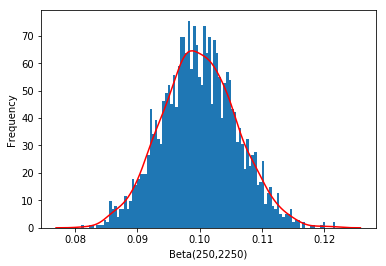

In [64]:
ax = sns.distplot(beta_data,
                kde=True,
                bins=100,
                kde_kws={"color": "r"},
                hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(250,2250)', ylabel='Frequency')

As we can see from the above graph range of probabilities is distributed around the 10% mark and the probabilities for next years conversion rate is almost certainly going to be somewhere in the range of 9.5 - 10.5%.

However, if we got half way through the year and things were going better than expected, we could also update our estimations based on our new information and predict how things will go for the rest of the year.

If our sales man had made 1250 calls and 200 were successful we could update our estimate by doing the following

In [57]:
updatebeta_data = np.random.beta(450, 3300, size=1250)
updatebeta_data

array([0.12170058, 0.12241824, 0.1201691 , ..., 0.12109969, 0.12360475,
       0.11784389])

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Beta(450,3300)')]

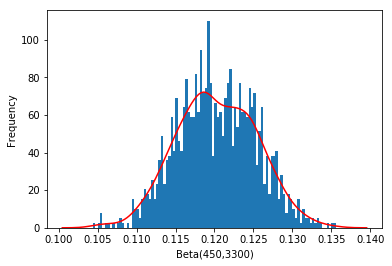

In [62]:
ax = sns.distplot(updatebeta_data,
                kde=True,
                bins=100,
                kde_kws={"color": "r"},
                hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(450,3300)', ylabel='Frequency')

In the above graph we can see that the new average convertion rate is around 12% and that we are likely to get a convertion rate of somewhere between 11.5% and 12.5% for the rest of the year.

#### 3.1.2. Gamma Distribution

Gamma distributions model the time between events which can then be used to feed into a Poisson Distribution or Exponential distribution (which we will discuss below).

Say we want to create a model for the time a lead must wait to be called by a member of our salesteam when we know the previous average calls per day is 1 per lead. The below model gets the predicted average number of calls per day per lead over the course of 250 days (the number of working days in a year).

Average time between calls: 1.0088328638877497


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


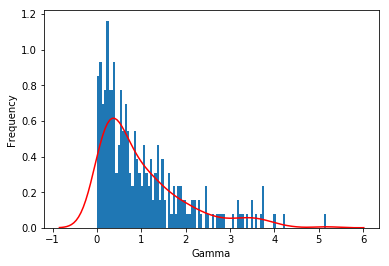

In [141]:
gamma_data = np.random.gamma(1, size=250)
ax = sns.distplot(gamma_data,
                kde=True,
                bins=100,
                kde_kws={"color": "r"},
                hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma', ylabel='Frequency')
print("Average time between calls:", np.mean(gamma_data))

### 3.2. Bernoulli / Binomial

A Bernoulli distribution is a the discrete probability distribution of a random variable with only two possible outcomes e.g. success / fail or true / false. The Bernoulli and Binomial distributions are related in that a Bernoulli distribution is basically a Binomial distribution with only one trial or attempt, whereas a Binomial distribution show the probability for multiple trials.

If we continue our sales call analogy we could look at the single next call our salesman is about to make. The call will either result in sale (success) or no sale (fail). There is no "Bernoulli" function in numpy, instead we just use the np.random.binomial function, but only run one trial.

The "binomial" function takes three parameters:
1. The number of trials - since this is a Bernoulli, there will be only 1.
2. The probability - this can be a float or an array. For this test we will take our update probality from the Beta distribution we calculated above.
3. The size / shape of the distribution.

Sum of successes: 3


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Bernoulli')]

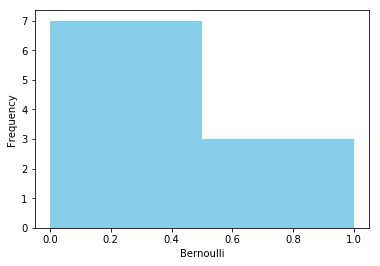

In [98]:
bern_data = np.random.binomial(1, 0.12, 10)
ax = sns.distplot(bern_data,
                  kde=False,
                  color ='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')
print("Sum of successes:", np.sum(bern_data))

We can see from the above graph that the results can be slightly higher or lower than than the probability we inputted, but if we ran the test 100, or 1000 times rather than, the results would be closer to the 12% probability we entered.

Sum of successes: 118


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Bernoulli')]

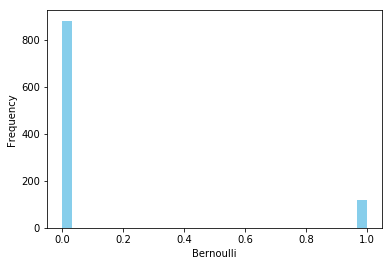

In [97]:
bern_updata = np.random.binomial(1, 0.12, 1000)
ax = sns.distplot(bern_updata,
                  kde=False,
                  color ='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')
print("Sum of successes:", np.sum(bern_updata))

As we can see the results are now closer to the 12%.

#### 3.2.1. Binomial Distribution

As stated above, a Binomial distribution is an expansion on the Bernoulli distribution. It is used the to obtain the number of successes from a large number of Bernoulli trials. For example is we wanted to see how our salesman is perdicted to perform over the course of the next two year we could input the following values.
1. The number of calls for two years is 5000 with each of these to a unique lead.
2. The probability of success is 12%. (we could have used our Beta distribution as an input instead)
3. The size of the sample we want to use - we will input 1000.

Sum of successes: 599810
Sum of failures: 4400190


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


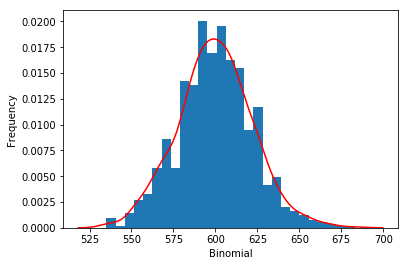

In [106]:
binom_data2 = np.random.binomial(5000, 0.12, size=1000)
ax = sns.distplot(binom_data2,
                  kde=True,
                  kde_kws={"color": "r"},
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')
print("Sum of successes:", np.sum(binom_data2))
print("Sum of failures:", 5000000-np.sum(binom_data2))

In [112]:
print("Average Success Rate:", np.mean(binom_data2)/5000*100)

Average Success Rate: 11.996199999999998
ModeResult(mode=array([593]), count=array([28]))


As we can see above our average success rate is very close to the 12% probability we entered, but we can see there is a chance is could go up or down slightly allowing us to plan for these scenarios.

### 3.3. Poisson Distribution

A Poisson distribution is related to a binomial distribution in that is also a discrete probability distribution, but it is used to "predict the probability of a given number of events occuring in a fixed interval of time if these events occur with a constant rate and independently of the same time since the last event" (see: https://en.wikipedia.org/wiki/Poisson_distribution).

For example, we could look at things from the point of view of the recipients of our sales calls. Lets say our combined sales team calls each lead an average of once per day, but our record keeping is sloppy and there is a chance multiple members of the salesteam might call the same lead or the same salesperson might even call the same lead more than once. If there are 250 working days in a year our Poisson distribution would appear as below.

Avarage probability of a call each day: 0.856


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


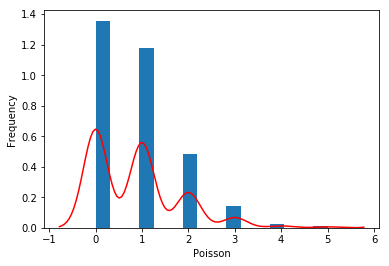

In [116]:
poisson_data = np.random.poisson(1, 250)
ax = sns.distplot(poisson_data,
                  kde=True,
                  kde_kws={"color": "r"},
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')
print("Avarage probability of a call each day:", np.mean(poisson_data))

As we can see above the chance of getting 1 call in a given day is close to 100%, but there is also a chance that there might be no calls in a day, or multiple calls from our salesteam in one day.

### 3.4. Exponential Distribution

An exponential distribution describes the time between events in a Poisson process. As with the Poisson distribution it depends on being memoryless, in that each event is completely independent of eachother.

Continuing with our badly organised team of salespeople and leads that are slowly edging towards getting an injunction. The exponential distribution will show us the average time the lead has to wait between recieving calls from our salespeople.

Here we are entering the same arguements as with the Poisson distribution. The scale is the average time segment between in events, which in this case is one day. The size, is our sample size which is 250 days (the number of working days in a year).

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


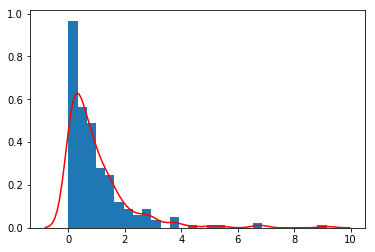

In [129]:
expo_data = np.random.exponential(scale=1, size=250)
ax = sns.distplot(expo_data,
                  kde=True,
                  kde_kws={"color": "r"},
                  hist_kws={"linewidth": 60,'alpha':1})

In [130]:
expo_data.mean()

0.994942003645638

As we can see from the results above the average time between calls is around one day,  but there is also a high probability that it is less than one day (might recieve multiple calls in a day), or there is a lower chance that the lead might have 2, 3, 4... days of peace before a call. However, exponential distributions by their nature have a maximum interval before the next call which in the above example appears to be 8-10 days.

## 4.0. Seeds and Pseudorandom Numbers

### 4.1. Introduction to Seeds

All Pseudorandom number generator require a seed to work. The basic explaination of the use for a seed is that using a seed will generate the same set of random numbers each time you feed it into a Pseudorandom Number Generator. 

For example, if I don't use a seed I will get a different number each time I generate a number using the rand function.

In [35]:
print("Random number 1 without seed:", np.random.rand())

print("Random number 2 without seed:", np.random.rand())

print("Random number 3 without seed:", np.random.rand())

Random number 1 without seed: 0.8023801435871755
Random number 2 without seed: 0.9137821803097357
Random number 3 without seed: 0.6150007828562263


However, if I set a "seed" I will get back the same random number each time.

In [36]:
np.random.seed(seed=1)
print("Random number 1 with seed:", np.random.rand())
np.random.seed(seed=1)
print("Random number 2 with seed:", np.random.rand())
np.random.seed(seed=1)
print("Random number 3 with seed:", np.random.rand())

Random number 1 with seed: 0.417022004702574
Random number 2 with seed: 0.417022004702574
Random number 3 with seed: 0.417022004702574


**Should you always use a seed in np.random?**

In the above example I have entered a number to generate the seed. If I had left the arguement blank or entered "None" as the arguement Numpy would have used the best available seed on my operating system. In Windows, this is the CryptGenRandom() function which generates a random seed using data from a combination inputs like of mouse click and keyboard key hits times, the user process ID, the system clock, memory status and more. This then is combined to use as seed for further randomisation. Therefore, in most cases, it is better to leave the seed arguement blank to generate a random number unless you want to make it repeatable or you have found a better source of seeds.

**Where can I get a truely random seed?**

There are two types of random number generator:
1. True Random Number generators, and 
2. Psuedo Random Number generators

The Numpy.Random package is a Pseudo random number generator. Pseudo Random number generators differ from True random number generators in that the numbers are not really random. They are based on algorithm (the Mersenne Twister in Python's and most other languages case) that selects numbers that seem random, but in reality can be reproduced or predicted if you manage to see what is happening "under the hood". This is what makes pseudo random number unreliable for security purposes such as encryption or generating passwords. True random number generators are impossible to predict (or close enough). One example of a True Random Number generator would be rolling a dice and seeing what you get. This would be pretty labourious for commercial application, so people have created several methods for getting true random numbers such as RANDOM.ORG which uses atmospheric noise or others that use quantum phenoena. As true random number generators can only produce a limited number of random numbers per second, they are often used to create the seed for a faster pseudorandom number generator. Python does have a seperate package for generating cryptographically strong random numbers, which is called Secrets.

### 4.2. Algorithms

Periods: How many numbers a PRNG can generate before it starts repeating itself.

Distributions: How random do you want the number to be. You can make them clump around different areas as we saw above

Algorithms:

1. **Middle Square method:** 
Square the middle number and on and on.

2.  **Linear Congruential Generator:** Used in alot. Super simple to use. Flaws in distribution. To run you need
    * Seed which is provided by the user
    * Multiplier (a)
    * Increment (c)
    * Modulus (m) 
Seed = (a x seed + c) % m

3. **Mersenne Twister:**
As I mentioned above this is the algorithm used by Python and is relatively speaking pretty good. It can pass all of the Diehard tests for measuring the quality of random number generators but is not good enough for generating cryptographically strong random numbers. 
